# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 балл] Загрузка данных и предобработка - загрузите датасет так, чтобы нулевой столбец выступал в качестве индекса датафрейма. Посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - `id`, которая совершенно не информативна и будет нам только мешать, давайте сразу её уберем.
2. [1 балл] Какое среднее число лайков в датасете? А медианное?
3. [1 балл] Какой источник (автор) создал больше всего мемов? 
4. [2 балла] Создайте переменные, отвечающие за месяц, день, час и день недели, в которые мем появлялся. В какой год было создано больше всего мемов? 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [3 балла] Похоже, что наши созданные переменные не очень хорошо смотреть на одном общем графике. Давайте потсроим отдельные для каждого. Постройте гистограмму для месяца выхода мема, указав число число разбиений равное 12 (по количеству месяцев в году). В какой месяц наплодили максимальное число мемов? Почему? Теперь постройте гистограмму для часа дня, указав логичное число разбиений. Как вы можете объяснить получившийся вид графика?
7. [1 балл] Вопрос-сюрприз! Попробуйте самостоятельно придумать какой-нибудь осмысленный вопрос для вашего датасета и ответьте на  него. Инициатива не наказуема ;)

## Итого - 7 баллов

### Комментарий к решению
С загрузкой справились, всё круто :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
Trump = pd.read_csv('Evseev_Vladislav_Trump.csv', index_col = 0)

In [111]:
Trump.head()

,timestamp,id,link,caption,author,network,likes
0,8/1/16 20:56,1742494,http://imgur.com/a/lNHED,"Son killed by\n country, in a\n in a\n war sta...",forwardsfromgrandma,imgur,-20
1,6/8/16 1:38,741754,http://imgur.com/qkpY5by,THERE'S ONLY ONE GENDER\n TRUMP IS A HERO\n VE...,shittyadviceanimals,imgur,-18
2,9/5/16 13:51,2278706,http://imgur.com/a/Cm6ls,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",politicalhumor,imgur,-17
3,9/27/16 23:21,2576782,http://imgur.com/X6zBaIM,Hey Trump! How did you cacth\n up to me in the...,politicalhumor,imgur,-14
4,4/20/16 20:07,316381,http://imgur.com/LgPKrP1,WANTED TRUMP FOR\n PRESIDENT\n TRUMPIKICKED HI...,NaN,imgur,-14


In [112]:
Trump.tail()

,timestamp,id,link,caption,author,network,likes
15888,4/14/16 10:44,260974,https://instagram.com/p/BELYHjLzg5b,like for justin\n ignore for donald trump,1599034994,instagram,179247
15889,1/7/16 17:39,619599,https://instagram.com/p/BAPxuKMjbCU,Who's more presidential?\n LIKE DJ Khaled\n IG...,1160610875,instagram,189256
15890,4/4/16 1:47,146633,https://instagram.com/p/BDwqwD-FXhZ,"I'm just saying, if trump wins were\n doomed!\...",1419706373,instagram,203460
15891,1/30/16 11:47,801619,https://instagram.com/p/BBKXt5yCbtt,Who would be a better\n president\n Like Potat...,1476135621,instagram,215972
15892,10/13/16 22:04,2944701,https://instagram.com/p/BLhOm04jUwD,isteal Tweets\n @ich Arnold\n If Donald Trump ...,1419706373,instagram,272678


### Комментарий к решению
Чтобы дропнуть столбец, нужно обязательно убедиться, что преобразование изменило исходный датасет. По умолчанию, `.drop()` не изменяем исходный датасет, чтобы изменения записались нужно либо указать еще одно ключевое слово `inplace=True`, либо просто сделать следующую конструкцию:

In [3]:
Trump = Trump.drop(['id'],axis=1)

In [113]:
# выкидываем ненужную переменную
Trump.drop (['id'],axis=1)

,timestamp,link,caption,author,network,likes
0,8/1/16 20:56,http://imgur.com/a/lNHED,"Son killed by\n country, in a\n in a\n war sta...",forwardsfromgrandma,imgur,-20
1,6/8/16 1:38,http://imgur.com/qkpY5by,THERE'S ONLY ONE GENDER\n TRUMP IS A HERO\n VE...,shittyadviceanimals,imgur,-18
2,9/5/16 13:51,http://imgur.com/a/Cm6ls,"TRUMP LOVES TRUMP, AND\n DOES WHAT HIS FOLLOWE...",politicalhumor,imgur,-17
3,9/27/16 23:21,http://imgur.com/X6zBaIM,Hey Trump! How did you cacth\n up to me in the...,politicalhumor,imgur,-14
4,4/20/16 20:07,http://imgur.com/LgPKrP1,WANTED TRUMP FOR\n PRESIDENT\n TRUMPIKICKED HI...,NaN,imgur,-14
5,9/27/16 20:50,http://imgur.com/a/3zSGZ,ONLY THE\n POOR\n AND ONLY THE\n STUPID\n PAY\...,politicalhumor,imgur,-13
6,10/26/16 4:35,http://imgur.com/a/Qzlra,When people you used to respect\n publicly sho...,me_irl,imgur,-12
7,7/26/16 19:45,http://imgur.com/a/R5Iqq,Yesterday at 09:15.\n There will never be a co...,politicalhumor,imgur,-12
8,7/20/16 3:51,http://imgur.com/a/lcjmr,"""You work hard for what you want in life\n tha...",funny,imgur,-12
9,5/5/16 23:08,http://imgur.com/BgtxDoF,4:33 PM\n 91%\n Search in\n #Never Trump\n Dan...,NaN,imgur,-12


### Комментарий к решению
Тут всё верно

In [114]:
Trump.likes. mean()

1522.4004278613227

In [115]:
Trump.likes.median()

42.0

### Комментарий к решению
Отлично, только пробелы лучше не писать между аргументами

In [116]:
Trump. author. mode()

0    politicalhumor
dtype: object

### Комментарий к решению
Тут всё верно

In [4]:
# переводим таймстэмпы в формат datetime, чтобы с ними было удобнее работать в дальнейшем
Trump['timestamp'] = Trump.timestamp.apply(lambda x: pd.to_datetime(x))

In [14]:
# создаем переменную "год", в который вышел мемчик
Trump['Year'] = Trump.timestamp.apply(lambda x: x.year)

# аналогично создайте переменные Month, Day, Hour, Weekday
Trump['Month'] = Trump.timestamp.apply(lambda x: x.month)
Trump['Day'] = Trump.timestamp.apply(lambda x: x.day)
Trump['Hour'] = Trump.timestamp.apply(lambda x: x.hour)
Trump['Weekday'] = Trump.timestamp.apply(lambda x: x.weekday())

### Комментарий к решению
Чтобы питон не печатал кучу `matplotlib.axes._subplots`, достаточно в конце последней строчки добавить точку с запятой ;

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245F0D96D68>,
      dtype=object)

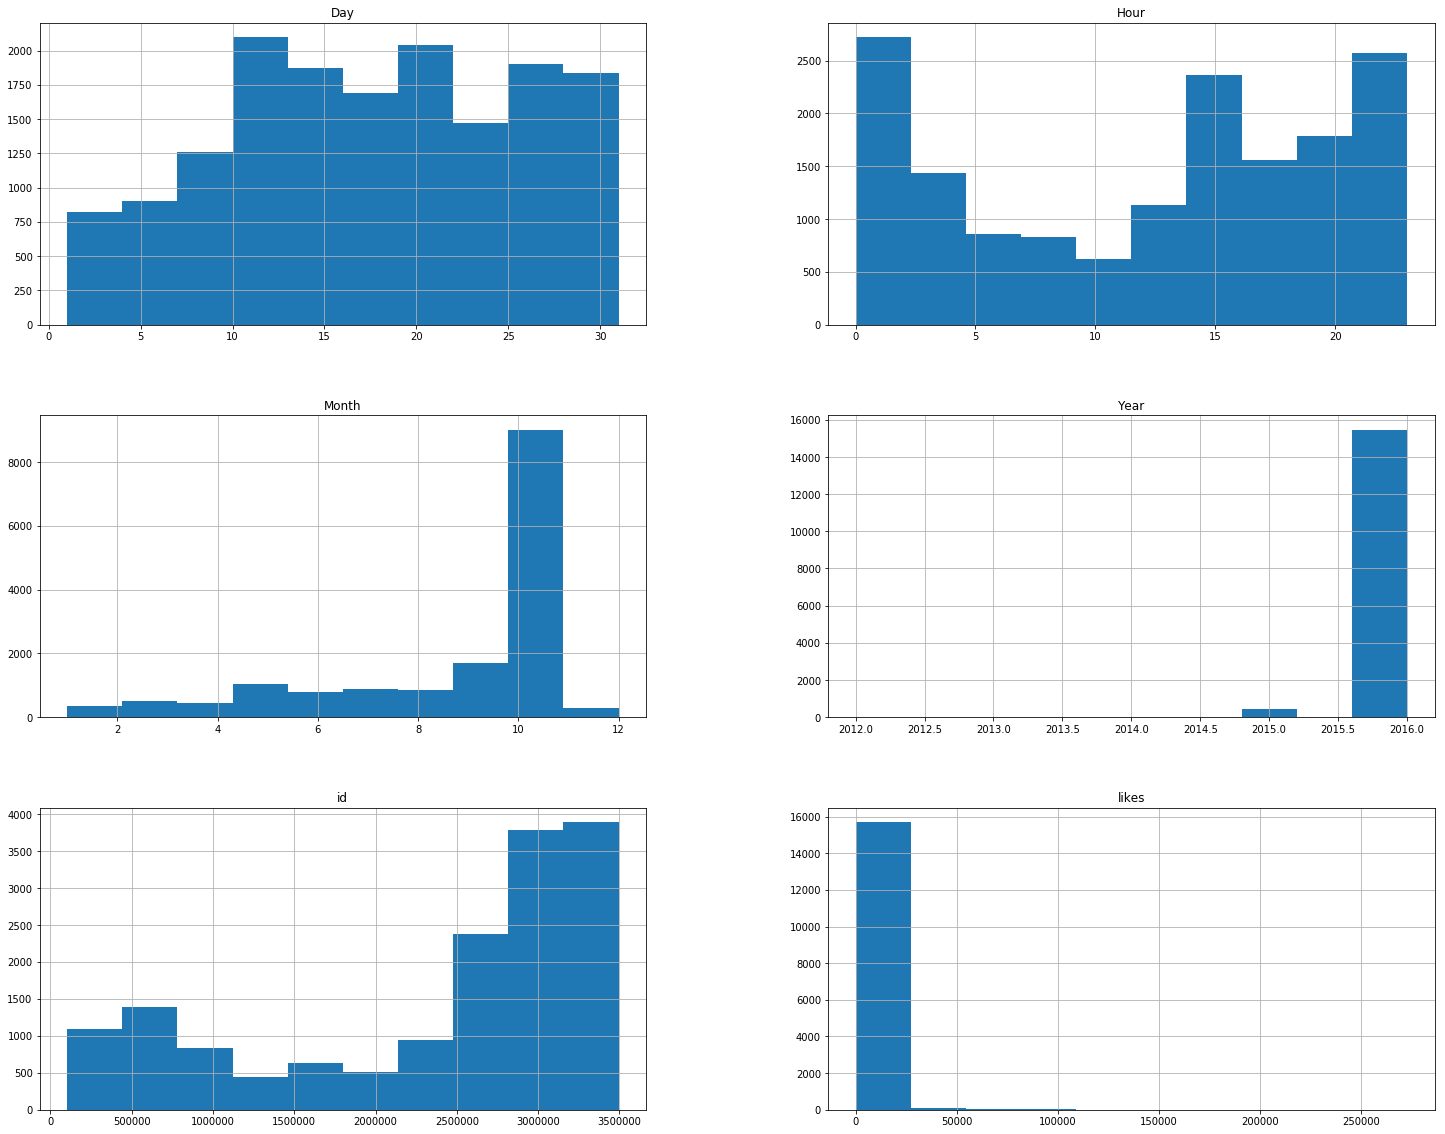

In [124]:
fig = plt.figure(figsize = (25,20)) 
ax = fig.gca() 
Trump.hist(ax = ax)

### Комментарий к решению
А вот шестого задания что-то у вас не видно :(

По гистограммам с разбиениями, соответствующими чиссу месяцев, дней, часов и дней недели можно всякие веселые закономерности было увидеть. Например то, что в основном мемы начинают постить после того, как добираются на работу - после 10 часов утра, а пик приходится на 2-3 часа ночи

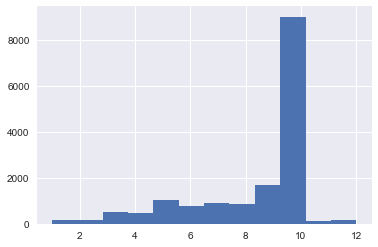

In [8]:
Trump.Month.hist(bins=12);

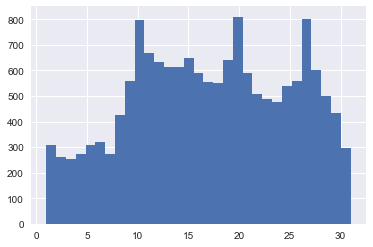

In [10]:
Trump.Day.hist(bins=31);

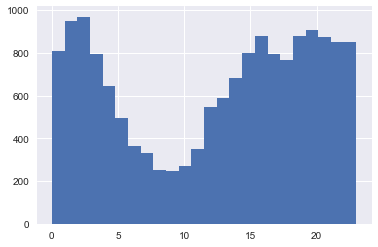

In [11]:
Trump.Hour.hist(bins=24);

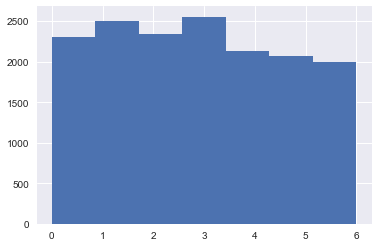

In [15]:
Trump.Weekday.hist(bins=7);

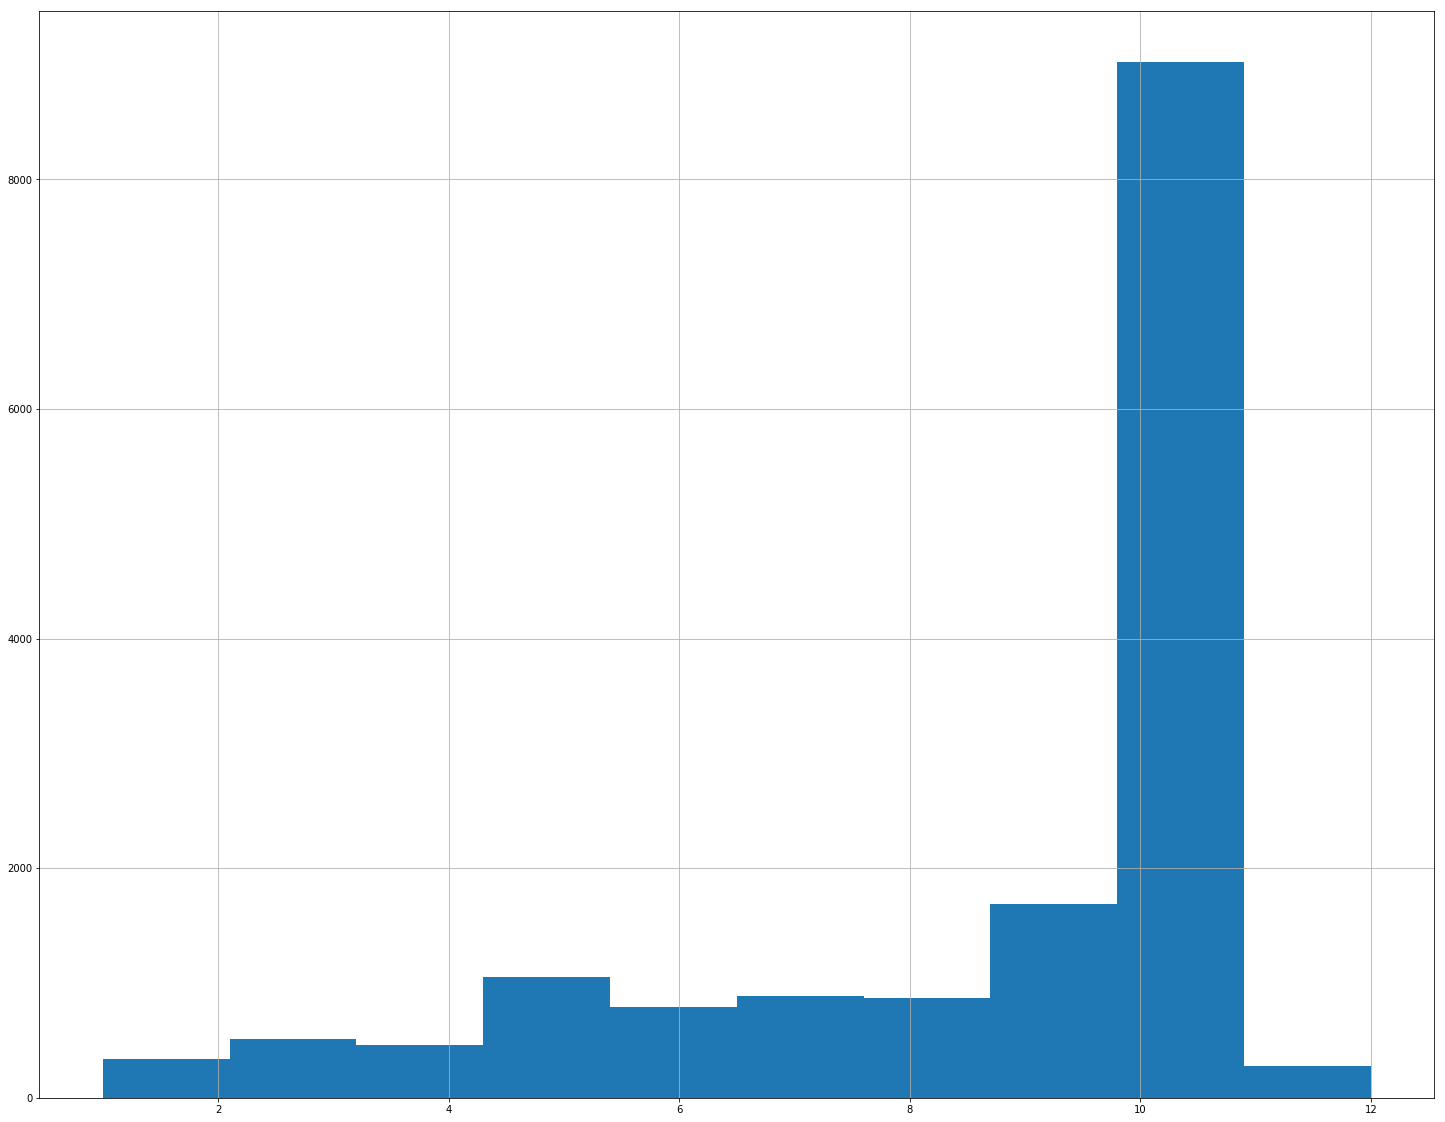

In [137]:
fig = plt.figure(figsize = (25,20)) 
ax = fig.gca() 
Trump['Month'].hist(ax = ax )

### Комментарий к решению
Неплохо так лайков насобирали, можно было еще посмотреть, а что это за запись такая

<STRONG>Какое максимальное количество лайков получила запись<STRONG>

In [31]:
Trump.likes.max()

272678

In [27]:
Trump[Trump.likes==272678].caption.values

array(['isteal Tweets\\n @ich Arnold\\n If Donald Trump Win i gotta start reading\\n all terms and conditions\\n fuck\\n around and sign up for slavery\\n 2016-10-11, 9:06 AM\\n 1.512\\n RETWEETS 1.605\\n LIKES'],
      dtype=object)

In [29]:
Trump[Trump.likes==272678].link

15892    https://instagram.com/p/BLhOm04jUwD
Name: link, dtype: object